<a href="https://colab.research.google.com/github/amirhnazerii/Personalized-Real-Estate-Agent/blob/main/generate_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HomeMatch: Create Synthetic Real Estate Listings Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
custom_path = "/content/drive/.../"
sys.path.append(custom_path)

## Step 1: Setting Up the Python Application

Initialize a Python Project: Create a new Python project, setting up a virtual environment and installing necessary packages like LangChain, a suitable LLM library (e.g., OpenAI's GPT), and a vector database package compatible with Python (e.g., ChromaDB or LanceDB).

- Existing Repository Requirements
```
langchain=0.0.305
openai=0.28.1
pydantic>=1.10.12
pytest>=7.4.0
sentence-transformers>=2.2.0
transformers>=4.31.0
chromadb==0.4.12
jupyter==1.0.0
tiktoken==0.4.0
```



In [ ]:
def installer():
    !pip install langchain==0.0.305
    !pip install openai==0.28.1
    !pip install pydantic>=1.10.12
    !pip install pytest>=7.4.0
    !pip install sentence-transformers>=2.2.0
    !pip install transformers>=4.31.0
    !pip install chromadb==0.4.12
    !pip install tiktoken==0.4.0

In [ ]:
if True:
  installer()

  Using cached tiktoken-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.2 kB)
Using cached tiktoken-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.7 MB)


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.output_parsers import PydanticOutputParser

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = ""
os.environ["OPENAI_API_BASE"] = ""

## Step 2: Generating Real Estate Listings

Generated real estate listings using a Large Language Model (GPT-3.5). Created listings in JSON format by crafting a prompt to GPT-3.5 to produce descriptions of various properties. An example of a listing might be:

```
Neighborhood: Green Oaks
Price: $800,000
Bedrooms: 3
Bathrooms: 2
House Size: 2,000 sqft

Description: Welcome to this eco-friendly oasis nestled in the heart of Green Oaks. This charming 3-bedroom, 2-bathroom home boasts energy-efficient features such as solar panels and a well-insulated structure. Natural light floods the living spaces, highlighting the beautiful hardwood floors and eco-conscious finishes. The open-concept kitchen and dining area lead to a spacious backyard with a vegetable garden, perfect for the eco-conscious family. Embrace sustainable living without compromising on style in this Green Oaks gem.

Neighborhood Description: Green Oaks is a close-knit, environmentally-conscious community with access to organic grocery stores, community gardens, and bike paths. Take a stroll through the nearby Green Oaks Park or grab a cup of coffee at the cozy Green Bean Cafe. With easy access to public transportation and bike lanes, commuting is a breeze.
```

#### Response consistency:

Used `pydantic` general library as well as `PydanticOutputParser` from `LangChain` package to obtain desired `format and type` in llm's response.  

In [ ]:
from pydantic import BaseModel, Field
from typing import Optional, List, Dict

class RealEstateListing(BaseModel):
    home_type: str = Field(..., description="Type of the home, e.g. Apartment, condo, town house")
    price: int = Field(..., description="The listing price of the property")
    bedrooms: int = Field(..., description="Number of bedrooms in the property")
    bathrooms: float = Field(..., description="Number of bathrooms in the property")  # Allow for half-baths
    house_size: int = Field(..., description="Size of the house in square feet")
    description: str = Field(..., description="A detailed description of the property")
    neighborhood: str = Field(..., description="The neighborhood where the property is located")
    neighborhood_description: Optional[str] = Field(None, description="Description of the neighborhood")

class RealEstateListings(BaseModel):
    properties: List[RealEstateListing] = Field(...)

In [ ]:
parser = PydanticOutputParser(pydantic_object= RealEstateListings)

In [ ]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"properties": {"title": "Properties", "type": "array", "items": {"$ref": "#/definitions/RealEstateListing"}}}, "required": ["properties"], "definitions": {"RealEstateListing": {"title": "RealEstateListing", "type": "object", "properties": {"home_type": {"title": "Home Type", "description": "Type of the home, e.g. Apartment, condo, town house", "type": "string"}, "price": {"title": "Price", "description": "The listing price of the property", "type": "integer"}, "bedrooms": {"title": "Bedrooms", "description": "Number of bedrooms

In [ ]:
llm = OpenAI(model_name="gpt-3.5-turbo")

prompt = PromptTemplate(
    template="{context} \n\n, format_instructions: {format_instructions}, user: {question}",
    input_variables=["question", "context"],
    partial_variables={"format_instructions": parser.get_format_instructions},
)

question = """
    Synthesize 50 realistic, logical, and factual real estate listings with various features.
"""

context = '''You are a professional licensed real estates realtor. \n
Answer the user questions accurately. output format = '{}' '''

query = prompt.format(context = context, question = question)

/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:202: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:790: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


In [ ]:
output = llm.predict(query)
# print(output)

In [ ]:
result = parser.parse(output)
print(result)

properties=[RealEstateListing(home_type='Apartment', price=200000, bedrooms=2, bathrooms=2.0, house_size=1100, description='Modern apartment with stunning city views', neighborhood='Downtown', neighborhood_description='Close to restaurants and shopping'), RealEstateListing(home_type='Condo', price=350000, bedrooms=3, bathrooms=2.5, house_size=1800, description='Luxurious waterfront condo with private balcony', neighborhood='Waterfront District', neighborhood_description='Scenic views and walking trails'), RealEstateListing(home_type='Townhouse', price=280000, bedrooms=4, bathrooms=3.0, house_size=2000, description='Spacious townhouse with attached garage', neighborhood='Suburban Estates', neighborhood_description='Family-friendly community'), RealEstateListing(home_type='Single Family Home', price=400000, bedrooms=5, bathrooms=4.0, house_size=3000, description='Charming colonial style home with large backyard', neighborhood='Historic District', neighborhood_description='Rich in history

In [ ]:
RealEstateListings_dict = result.dict()

In [ ]:
import json
filename = "RealEstateListingsDataset.json"
with open(custom_path+filename, 'w') as f:
    json.dump(RealEstateListings_dict, f)

In [ ]:
def add_idx(ls_of_dicts):

    ls = list()
    for i, Dict in enumerate(ls_of_dicts):
        Dict["id"] = i
        ls.append(Dict)
    return ls

data2= add_idx(data["properties"])

/content


In [ ]:
with open(custom_path+"/RealEstateListingsDatasetv2.json", 'w') as f:
    json.dump(data2, f)

In [3]:
import json
with open('RealEstateListingsDatasetv2.json', 'r') as f:
   data = json.load(f)

In [5]:
data

[{'home_type': 'Apartment',
  'price': 200000,
  'bedrooms': 2,
  'bathrooms': 2.0,
  'house_size': 1100,
  'description': 'Modern apartment with stunning city views',
  'neighborhood': 'Downtown',
  'neighborhood_description': 'Close to restaurants and shopping',
  'id': 0},
 {'home_type': 'Condo',
  'price': 350000,
  'bedrooms': 3,
  'bathrooms': 2.5,
  'house_size': 1800,
  'description': 'Luxurious waterfront condo with private balcony',
  'neighborhood': 'Waterfront District',
  'neighborhood_description': 'Scenic views and walking trails',
  'id': 1},
 {'home_type': 'Townhouse',
  'price': 280000,
  'bedrooms': 4,
  'bathrooms': 3.0,
  'house_size': 2000,
  'description': 'Spacious townhouse with attached garage',
  'neighborhood': 'Suburban Estates',
  'neighborhood_description': 'Family-friendly community',
  'id': 2},
 {'home_type': 'Single Family Home',
  'price': 400000,
  'bedrooms': 5,
  'bathrooms': 4.0,
  'house_size': 3000,
  'description': 'Charming colonial style hom

### Add relevant images to listings description using Google Custom Search API

In [4]:
api_key = ''
cse_id = ''

In [5]:
unique_imgs = []

In [6]:
from googleapiclient.discovery import build
import os

def search_images_google(query, api_key, cse_id, num_results=1):
    """
    Searches for images using the Google Custom Search API.

    Args:
        query: The search term for the images.
        api_key: Your Google Cloud API key.
        cse_id: Your Google Custom Search Engine ID.
        num_results: Number of results to fetch (default is 1).

    Returns:
        A list of image URLs, or an empty list if no results found.
    """
    try:
        # Build the custom search API service
        service = build('customsearch', 'v1', developerKey=api_key)

        # Perform the search with specified parameters
        res = service.cse().list(
            q=query,
            cx=cse_id,
            searchType='image',
            num=num_results  # Specify the number of results
        ).execute()

        # Extract image URLs
        image_urls = [item['link'] for item in res.get('items', [])]

        return image_urls

    except Exception as e:
        print(f"Error occurred during the search: {e}")
        return []

In [7]:
data[0]

{'home_type': 'Apartment',
 'price': 200000,
 'bedrooms': 2,
 'bathrooms': 2.0,
 'house_size': 1100,
 'description': 'Modern apartment with stunning city views',
 'neighborhood': 'Downtown',
 'neighborhood_description': 'Close to restaurants and shopping',
 'id': 0}

In [8]:
def fetch_imgs_to_dataset(data):

    
    for i, listing in enumerate(data):
    
        # Prompt the user to enter a search term
        search_term = "image of" + " " + listing['description'] 

        # Fetch image URLs using the search function
        image_urls = search_images_google(search_term, api_key, cse_id)
        listing['url'] = image_urls[0]
    return data   

In [9]:
dataset = fetch_imgs_to_dataset(data)

Chic modern loft with industrial accents


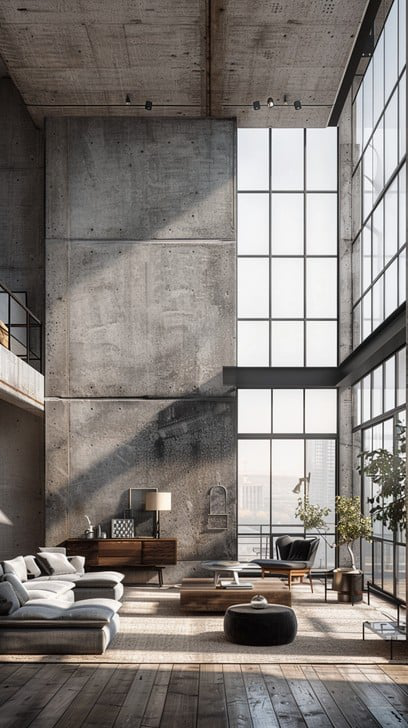

In [26]:
from PIL import Image
import io
import requests

def request_img_and_show(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content)) 
    return img

print(dataset[22]['description'])
request_img_and_show(dataset[22]['url'])

#### Save added images to the dataset.

In [25]:
with open('RealEstateListingsDatasetv3.json', 'w') as f:
    json.dump(dataset, f)